# EDA TERRORISM (Case Study)

### task: 
As a security/defense analyst, try to find out the hot zone of terrorism. Handle the missing value, Do compare the various region…. visualize it and showing it on global map would be better to understand.

In [17]:
#Importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
#Import dataset using read_csv
try:
    data = pd.read_csv('golbal terr.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [76]:
data = data[np.isfinite(data.latitude)]
print(data)

             eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970000e+11   1970       1     0        NaN         0        NaN   
3       1.970000e+11   1970       1     0        NaN         0        NaN   
4       1.970000e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.020000e+11   2017      12    31        NaN         0        NaN   
181687  2.020000e+11   2017      12    31        NaN         0        NaN   
181688  2.020000e+11   2017      12    31        NaN         0        NaN   
181689  2.020000e+11   2017      12    31        NaN         0        NaN   
181690  2.020000e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            5

In [20]:
data.shape

(177135, 135)

In [21]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [22]:
#number of unique columns in dataset
no_of_cols = data.columns.nunique()
print(no_of_cols)

135


In [23]:
#let's rename some important columns
data=data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [24]:
data

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.020000e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.020000e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.020000e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.020000e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [25]:
#collecting specific columns from dataset that are required for analysis
data = data[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [26]:
data

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


### cleaning the data

In [27]:
data['Target_subtype'] = data['Target_subtype'].fillna('others')
data['State']=data['State'].fillna('Unknown')
data['City']=data['City'].fillna('Unknown')

In [28]:
data.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [29]:
data

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [30]:
data.shape

(177135, 12)

the no of columns has been reduced to 12 from 135

In [31]:
data.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

Now, there are no null values in the data

In [32]:
data.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [33]:
data.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [34]:
Total_countries=data['Country'].nunique()
Total_countries

204

In [35]:
print(data['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Middle East & North Africa' 'Australasia & Oceania' 'South Asia'
 'Sub-Saharan Africa' 'Central Asia']


In [36]:
print(data['Region'].nunique())

12


In [37]:
print(data['Attack_type'].unique())



['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [38]:
print(data['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [39]:
print(data['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [40]:
print(data['Gang_name'].nunique())

3463


In [41]:
print(data['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [42]:
data.info

<bound method DataFrame.info of         Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                  State           City     

### statistical description of the dataset.

In [43]:
data.describe

<bound method NDFrame.describe of         Year  Month  Day             Country                       Region  \
0       1970      7    2  Dominican Republic  Central America & Caribbean   
1       1970      0    0              Mexico                North America   
2       1970      1    0         Philippines               Southeast Asia   
3       1970      1    0              Greece               Western Europe   
4       1970      1    0               Japan                    East Asia   
...      ...    ...  ...                 ...                          ...   
181686  2017     12   31             Somalia           Sub-Saharan Africa   
181687  2017     12   31               Syria   Middle East & North Africa   
181688  2017     12   31         Philippines               Southeast Asia   
181689  2017     12   31               India                   South Asia   
181690  2017     12   31         Philippines               Southeast Asia   

                  State           City   

In [44]:
# Top 10 countries with most attack
data['Country'].value_counts().head(10)

Country
Iraq              24487
Pakistan          14318
Afghanistan       12639
India             11801
Colombia           7835
Philippines        6528
Peru               5808
United Kingdom     5227
El Salvador        4846
Turkey             4126
Name: count, dtype: int64

In [45]:
# Top 10 regions around globe with most attacks
data['Region'].value_counts().head(10)

Region
Middle East & North Africa     49577
South Asia                     44479
South America                  18110
Sub-Saharan Africa             17012
Western Europe                 16482
Southeast Asia                 11946
Central America & Caribbean     9344
Eastern Europe                  5117
North America                   3450
East Asia                        794
Name: count, dtype: int64

In [46]:
# States of different countries around globe with most attacks
data['State'].value_counts().head(10)


State
Baghdad               7645
Northern Ireland      4497
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3205
Khyber Pakhtunkhwa    3084
Diyala                3041
Lima                  2615
Name: count, dtype: int64

In [47]:
data['Target_subtype'].value_counts().head(10)

Target_subtype
Unnamed Civilian/Unspecified                               11396
Police Security Forces/Officers                            11003
others                                                     10147
Military Personnel (soldiers, troops, officers, forces)     7825
Military Unit/Patrol/Convoy                                 7621
Government Personnel (excluding police, military)           6477
Village/City/Town/Suburb                                    6264
Politician or Political Party Movement/Meeting/Rally        6122
Police Building (headquarters, station, school)             5826
Military Barracks/Base/Headquarters/Checkpost               5079
Name: count, dtype: int64

In [48]:
data['City'].value_counts().head(10)

City
Unknown         7961
Baghdad         7589
Karachi         2651
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1580
San Salvador    1558
Istanbul        1048
Name: count, dtype: int64

In [49]:
data['Attack_type'].value_counts().head(10)

Attack_type
Bombing/Explosion                      86844
Armed Assault                          41107
Assassination                          18819
Hostage Taking (Kidnapping)            10671
Facility/Infrastructure Attack         10186
Unknown                                 6931
Unarmed Assault                          986
Hostage Taking (Barricade Incident)      962
Hijacking                                629
Name: count, dtype: int64

In [50]:
data['Target_type'].value_counts().head(10)

Target_type
Private Citizens & Property       42569
Military                          26893
Police                            24140
Government (General)              20809
Business                          20274
Transportation                     6550
Unknown                            5831
Utilities                          5552
Religious Figures/Institutions     4382
Educational Institution            4269
Name: count, dtype: int64

In [51]:
data['Gang_name'].value_counts().head(10)

Gang_name
Unknown                                             81486
Taliban                                              7457
Islamic State of Iraq and the Levant (ISIL)          5584
Shining Path (SL)                                    4306
Al-Shabaab                                           3274
Farabundo Marti National Liberation Front (FMLN)     2991
Irish Republican Army (IRA)                          2662
New People's Army (NPA)                              2502
Boko Haram                                           2408
Revolutionary Armed Forces of Colombia (FARC)        2332
Name: count, dtype: int64

In [52]:
data['Weapon_type'].value_counts().head(5)

Weapon_type
Explosives    91007
Firearms      56571
Unknown       14300
Incendiary    10940
Melee          3567
Name: count, dtype: int64

### DATA VISUALIZATIONS

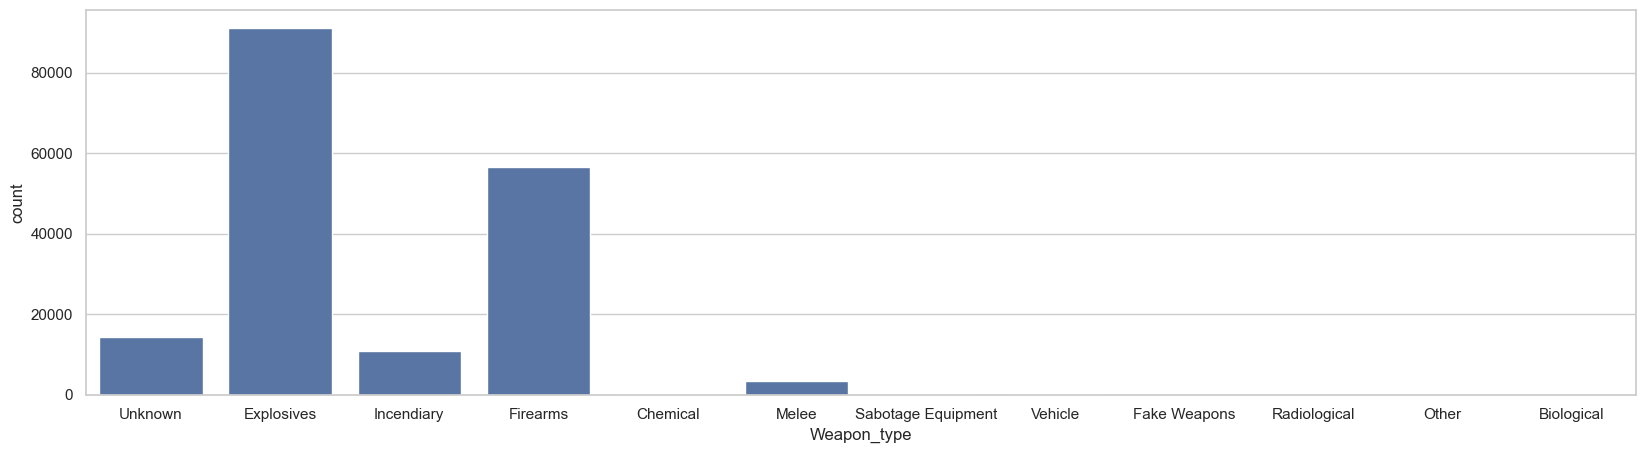

In [53]:
# Graph depicts most common weapon used to attack
plt.figure(figsize=(20,5));
sns.countplot(x=data.Weapon_type);


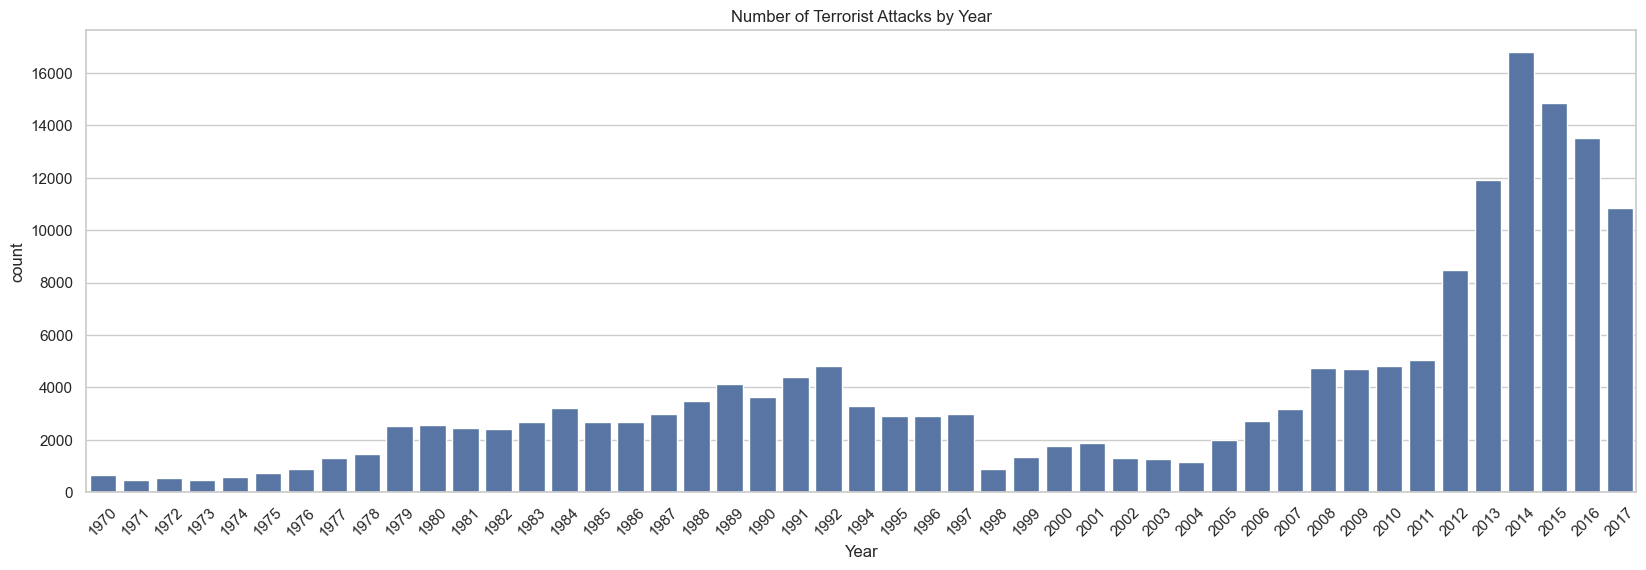

In [54]:
# Graph depicts number of terrorist attack happening per year
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=45)
plt.title('Number of Terrorist Attacks by Year')
plt.show()

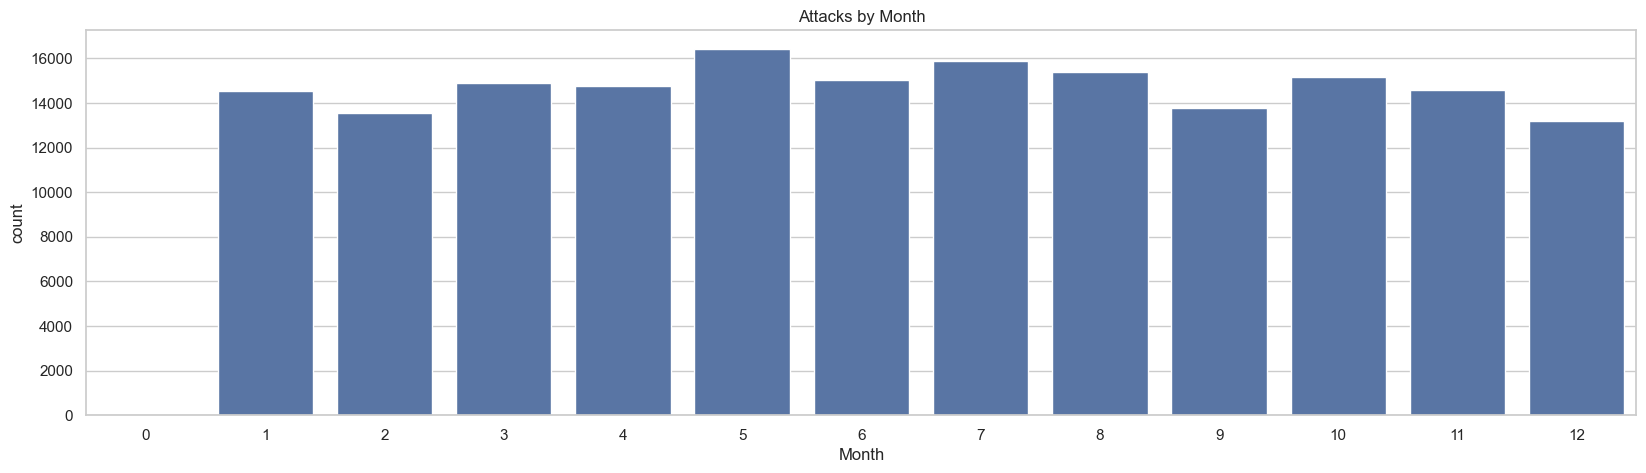

In [55]:
# Graph depicts attacks happening in a particular month
plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=data.Month);

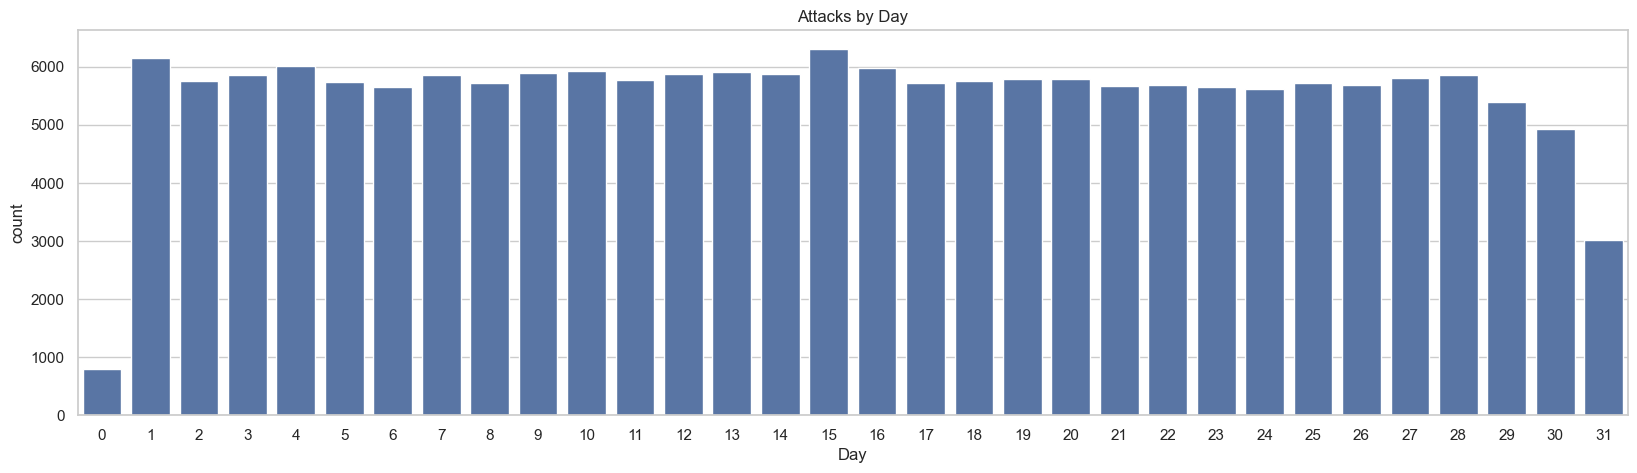

In [56]:
# Graph depicts most common day  to attack
plt.figure(figsize=(20,5));
plt.title('Attacks by Day')
sns.countplot(x=data.Day);

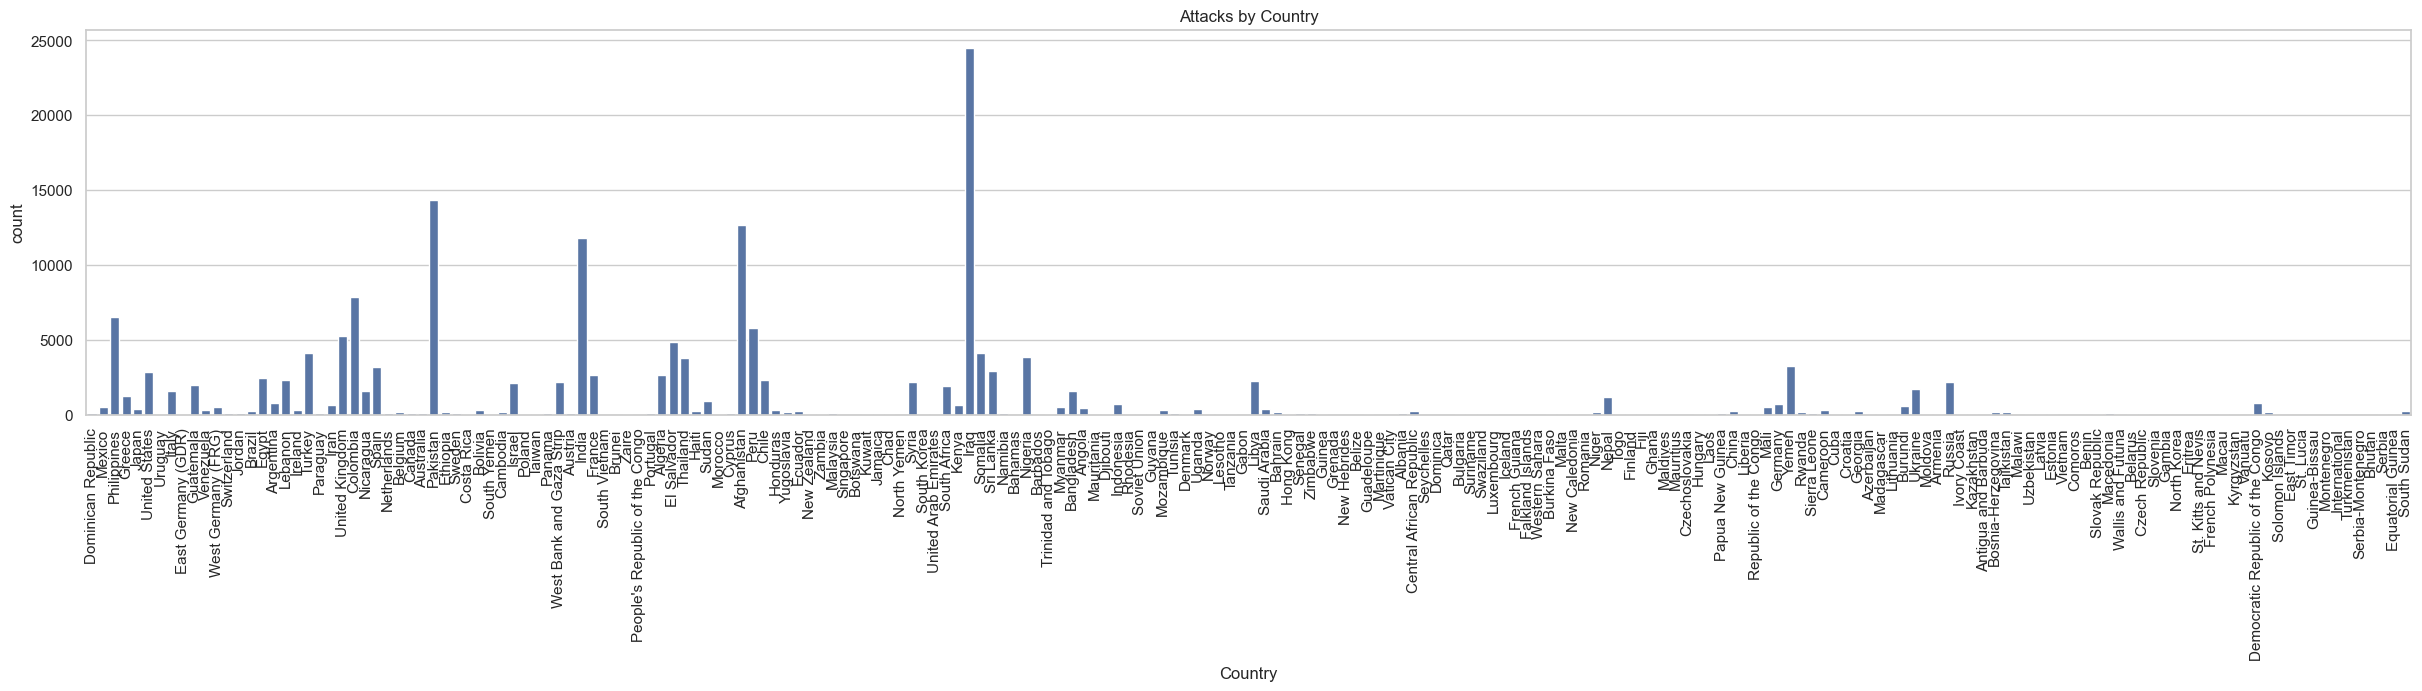

In [57]:
# Graph depicts country with most number of attacks
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=data.Country);

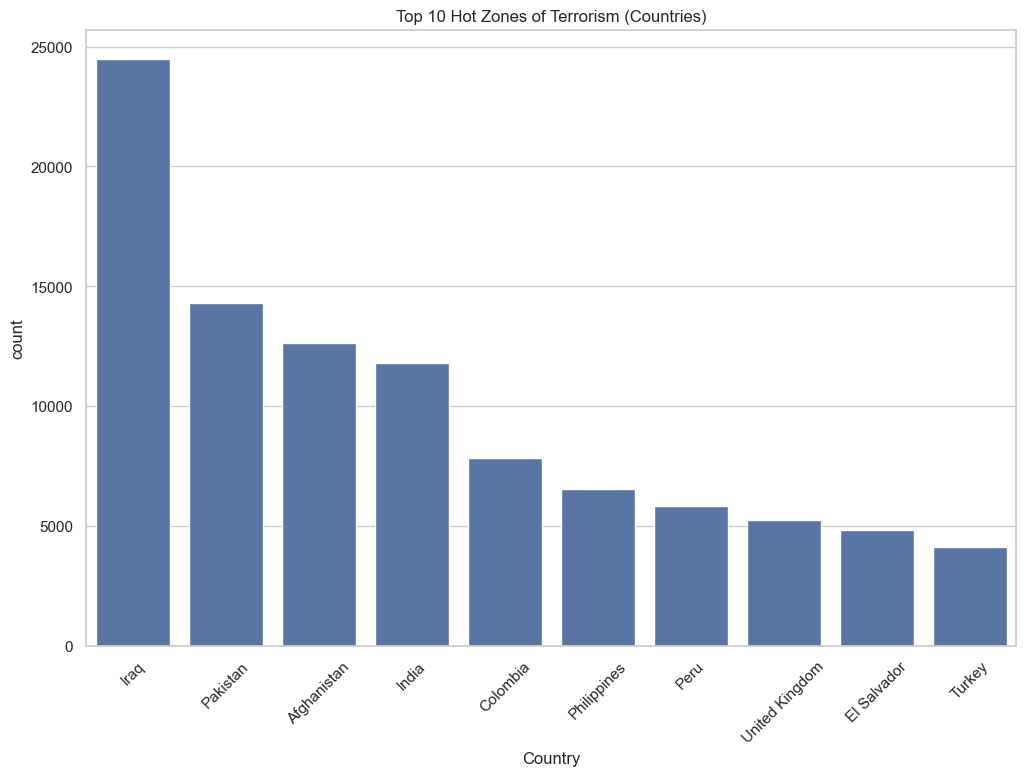

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=data, order=data['Country'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Hot Zones of Terrorism (Countries)')
plt.show()

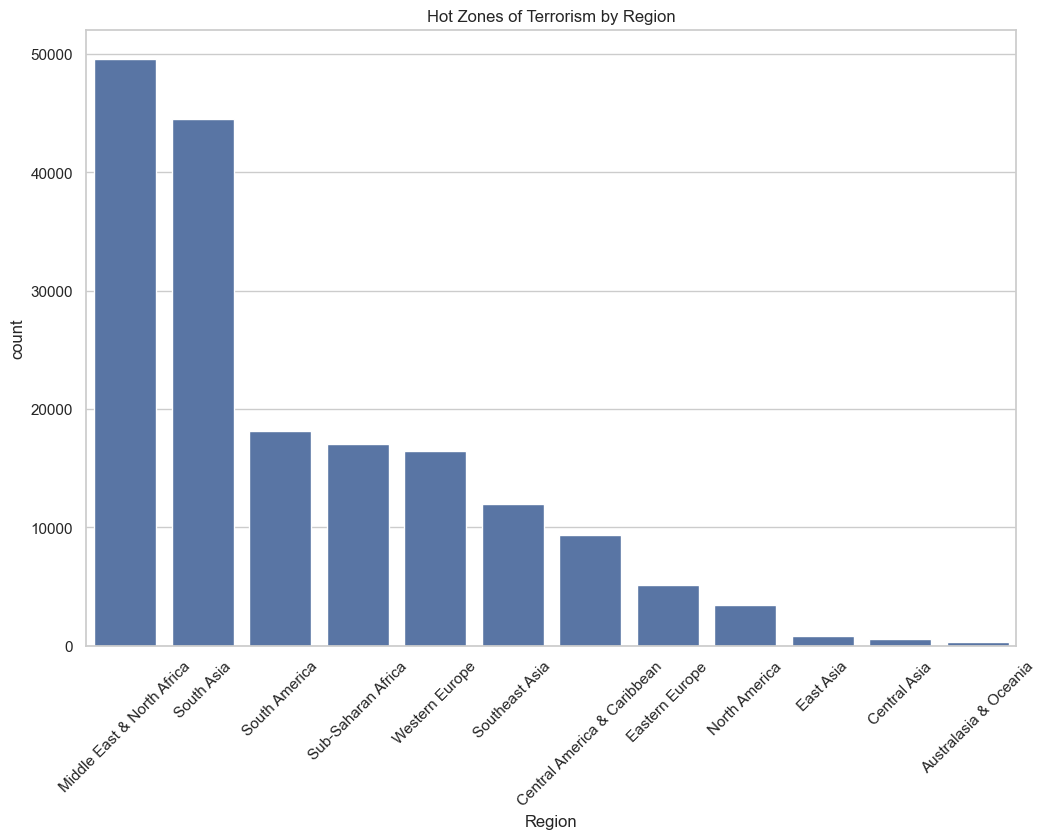

In [59]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Region', data=data, order=data['Region'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Hot Zones of Terrorism by Region')
plt.show()

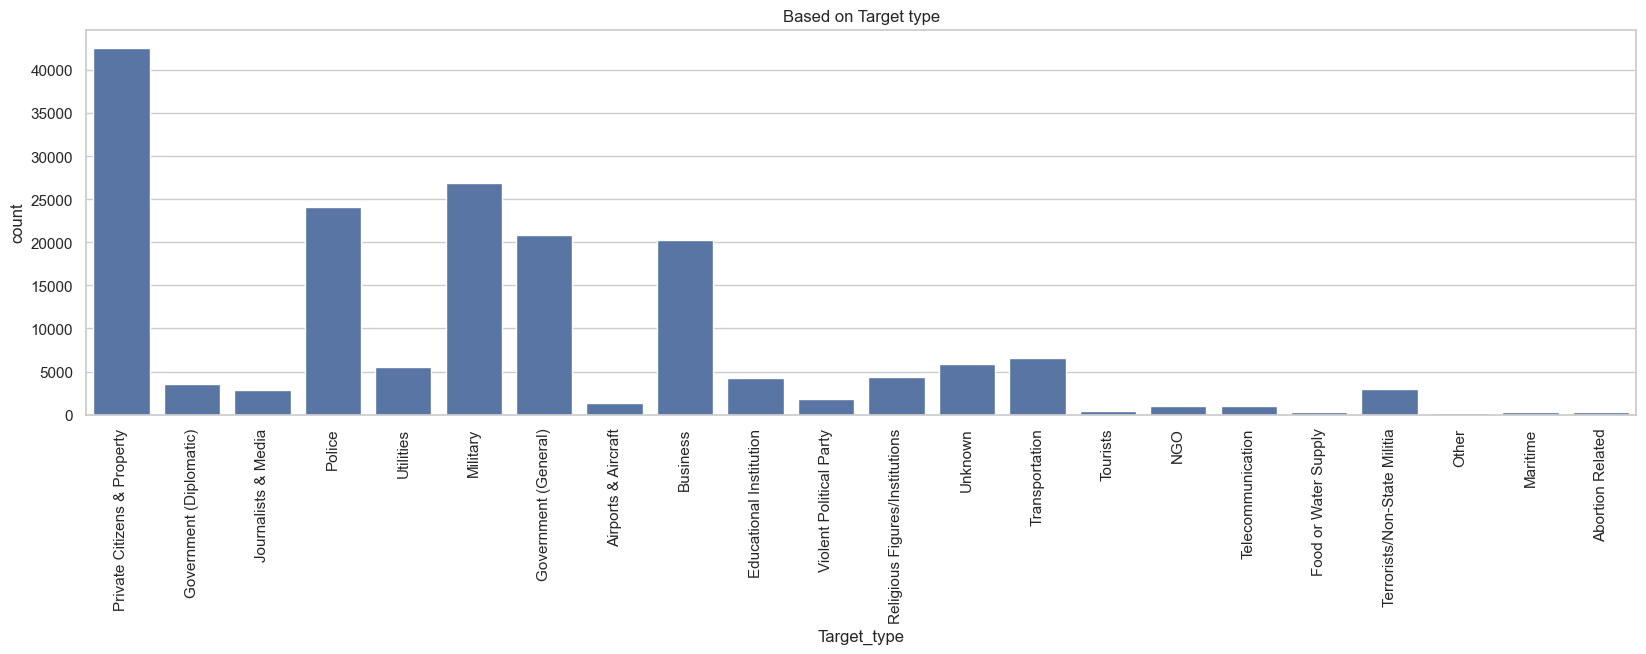

In [60]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=data.Target_type);

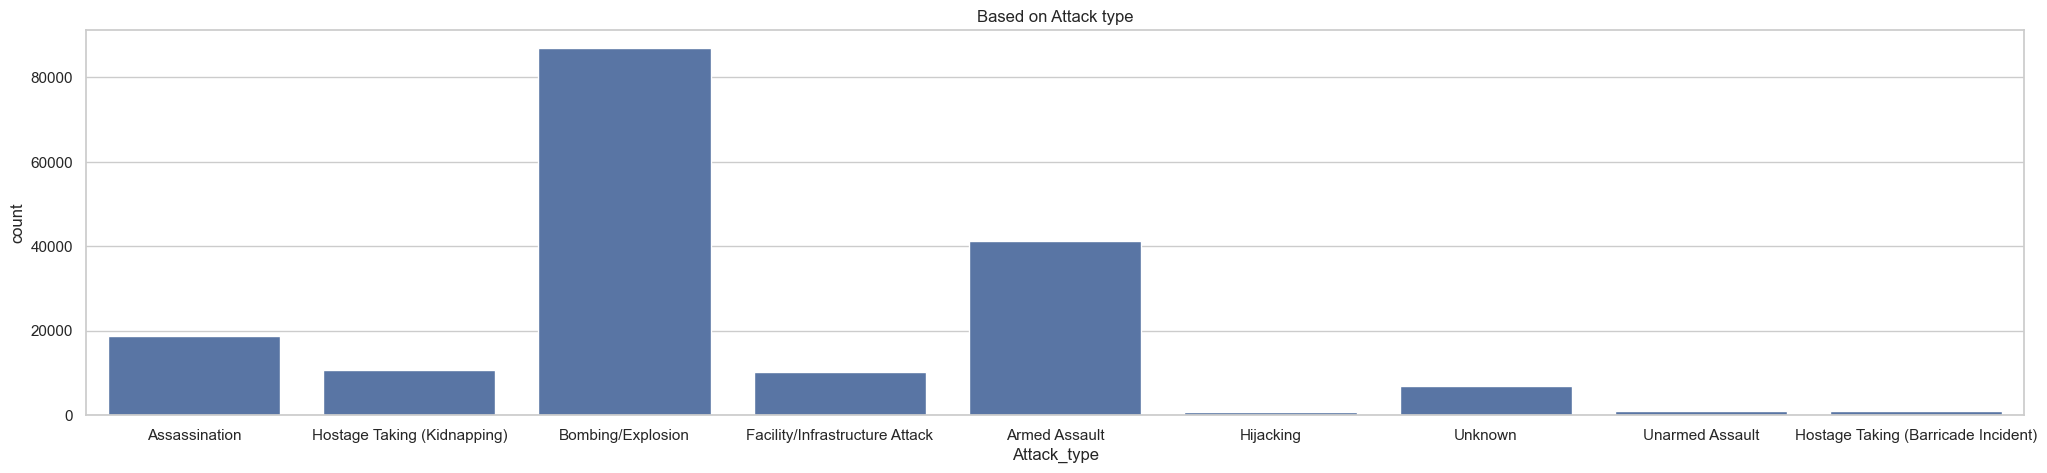

In [61]:
# Graph depicts most common method to attack
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=data.Attack_type);


### Results of analysis
1.Most of the attacks were attacked through explosives and then through firearms.

2.Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.

3.Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.

4.Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.

5.The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

6.For most of the attacks, the target is Private Citizens& property and the next Military leads.

7.Most of the attacks were through either Bombing or Explosion.

### Measures to be Taken to Reduce Terrorism
1.By reducing access to dangerous weapons

2.Government should provide more security over countries

3.Security should be strengthened across borders

4.Government should take measures on increased immigration

5.and many more…